# Portfolio's Risk n Return Exercise

In [54]:
import pandas as pd
import numpy as np

In [55]:
df = pd.read_excel('data.xlsx', 
    sheet_name='Sheet1', 
    index_col=0,
    skiprows=[0, 1]) # skip the row with the column titles
df.head()

,S&P 500,MSFT,WBA,TSLA
Date,,,,
2010-12-01,1257.640015,23.976345,34.562576,26.629999
2011-01-03,1286.119995,23.821714,35.875526,24.100000
2011-02-01,1327.219971,22.968760,38.607777,23.889999
2011-03-01,1325.829956,21.940435,35.757179,27.750000
2011-04-01,1363.609985,22.398430,38.055477,27.600000


## PART 1

Compute monthly returns using the adjusted closing prices

In [56]:
returns = df.pct_change()
# drop first row from your DataFrame
returns.drop(returns.index[0], inplace=True)

# get returns of three stocks for calculation
df3 = returns[['MSFT', 'WBA', 'TSLA']]

# equally-weighted between MSFT, WBA, and TSLA
w1 = [1/3, 1/3, 1/3]
returns['P1'] = np.dot(df3, w1)

# 30% in MSFT, 20% WBA, and 50% TSLA
w2 = [0.3, 0.2, 0.5]
returns['P2'] = np.dot(df3, w2)

# 50% in MSFT, 30% WBA, and 20% TSLA
w3 = [0.5, 0.3, 0.2]
returns['P3'] = np.dot(df3, w3)

# 20% in MSFT, 50% WBA and 30% TSLA
w4 = [0.2, 0.5, 0.3]
returns['P4'] = np.dot(df3, w4)

Compute variance-covariance matrix for MSFT, WBA, and TSLA

In [57]:
df3.cov()

,MSFT,WBA,TSLA
MSFT,0.003972,0.000289,0.001668
WBA,0.000289,0.005596,0.000123
TSLA,0.001668,0.000123,0.027661


Compute correlation matrix for MSFT, WBA, and TSLA 

In [58]:
df3.corr()

,MSFT,WBA,TSLA
MSFT,1.000000,0.061404,0.159141
WBA,0.061404,1.000000,0.009883
TSLA,0.159141,0.009883,1.000000


### Compute expected return and volatility for each portfolio (monthly)

In [59]:
# calculate average return
returns.mean()

S&P 500    0.008684
MSFT       0.015728
WBA        0.017635
TSLA       0.048767
P1         0.027377
P2         0.032629
P3         0.022908
P4         0.026593
dtype: float64

In [60]:
# calculate risk
returns.std()

S&P 500    0.033771
MSFT       0.063023
WBA        0.074807
TSLA       0.166315
P1         0.067815
P2         0.089757
P3         0.055121
P4         0.065896
dtype: float64

Another method for calculating portfolio's risk without portfolio's monthly returns

In [63]:
weights = np.array([1/3, 1/3, 1/3])
np.dot( np.dot(weights, df3.cov()), weights.T) ** 0.5

0.06781492286970635

## PART 2

Create a scatter plot that shows the average return and standard deviation for:
- the three stocks
- the S&P index
- the four portfolios

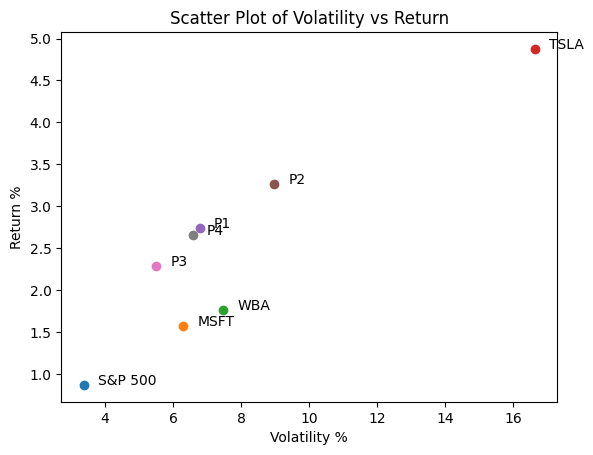

In [62]:
import matplotlib.pyplot as plt

#create figure
fig=plt.figure()
labels = returns.columns.array
er = returns.mean() * 100
risk = returns.std() * 100

for x, y, label in zip(risk, er, labels):
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(10,0), textcoords="offset points")

#labelling the axes
plt.xlabel('Volatility %')
plt.ylabel('Return %')

#optional title
plt.title('Scatter Plot of Volatility vs Return')

#showing plot
plt.show()